In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'DDOG', 'DOCS', 'DOCU',
    'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG', 'INTG',
    'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH',
    'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PANW', 'PAYC', 'PINS', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO',
    'TWTR', 'UPST', 'VEEV', 'VLD', 'XPEV', 'ZEN', 'ZM']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

64

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-08-13', datetime.date(2022, 8, 13))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  67 of 67 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADBE
   ...ADYEY
   ...AMD
   ...AMZN
   ...ANET
   ...ASML
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...DDOG
   ...DOCS
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...OKTA
   ...OPEN
   ...PANW
   ...PAYC
   ...PINS
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...RIVN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...VLD
   ...XPEV
   ...ZEN
   ...ZM
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2512   2022-08-08
2513   2022-08-09
2514   2022-08-10
2515   2022-08-11
2516   2022-08-12
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.999872
2       1.001140
3       1.007101
4       1.001872
5       0.999979
          ...   
2512    0.998762
2513    0.995751
2514    1.021291
2515    0.999295
2516    1.017322
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.003227
2,1.016990
3,1.022486
4,1.012689
5,1.003550
...,...
2512,1.027042
2513,0.988381
2514,1.063403
2515,1.001906


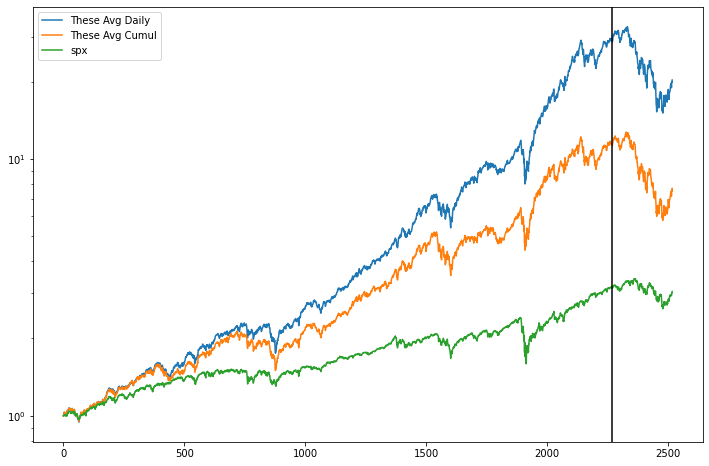

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-08-13,NaN,NaN
1,2012-08-14,0.997998,0.997998
2,2012-08-15,1.009002,1.008725
3,2012-08-16,1.023583,1.023365
4,2012-08-17,1.030835,1.030662


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-08-08,19.728228,7.413066
2513,2022-08-09,18.964570,7.167445
2514,2022-08-10,20.011013,7.598542
2515,2022-08-11,19.891956,7.492499
2516,2022-08-12,20.304703,7.681767


In [11]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

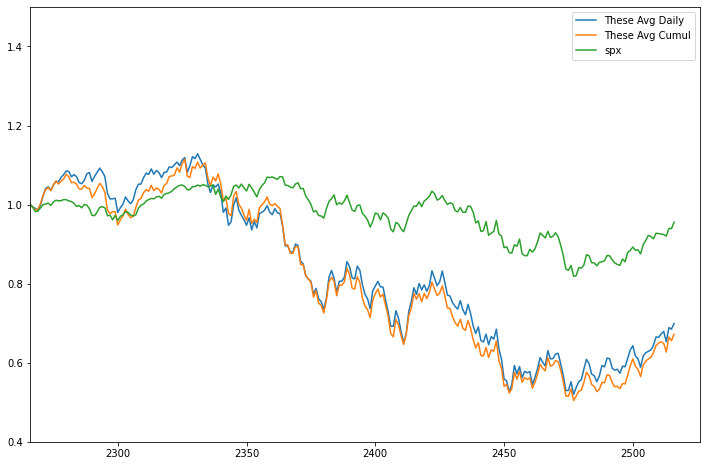

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1306,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1307,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1308,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1309,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1310,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1306,16.26,16.26,16.990,14.00
1307,15.26,15.26,16.399,15.12
1308,15.24,15.24,15.860,14.77
1309,13.73,13.73,15.430,13.62
1310,14.02,14.02,14.160,13.81


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1306,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1307,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1308,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1309,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1310,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.987751
Name: HighMult, dtype: float64


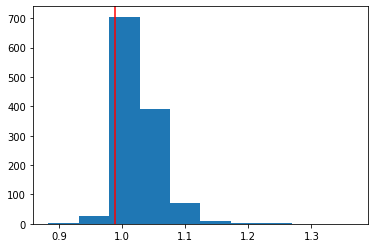

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0157957886471027


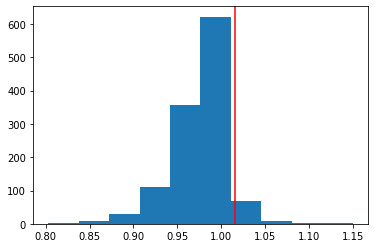

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0157957886471027, 0.9877506091438579)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0082656309731297, 0.9940764553692383)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1306,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1307,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1308,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1309,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1310,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0119142868992252,
 0.9873268273127517,
 1.0177439618628619,
 0.9880190723630928)

In [27]:
get_hilo_mults(aapl)

(1.0064753180543797,
 0.9955401271705285,
 1.0096450768498901,
 0.9922922994683565)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006475,0.995540,1.009645,0.992292
1,ABMD,1.003984,0.997197,1.005079,0.996756
2,ABNB,1.011112,0.993684,1.012635,0.981947
3,ADBE,1.005153,0.995815,1.007071,0.994718
4,ADYEY,1.025274,0.979996,1.028975,0.966381


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,172.100006,AAPL
ABMD,293.589996,ABMD
ABNB,124.510002,ABNB
ADBE,445.670013,ADBE
ADYEY,19.200001,ADYEY
...,...,...
ZEN,76.510002,ZEN
ZM,109.519997,ZM
^GSPC,4280.149902,^GSPC
^IXIC,13047.185547,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006475,0.995540,1.009645,0.992292,172.100006
1,ABMD,1.003984,0.997197,1.005079,0.996756,293.589996
2,ABNB,1.011112,0.993684,1.012635,0.981947,124.510002
3,ADBE,1.005153,0.995815,1.007071,0.994718,445.670013
4,ADYEY,1.025274,0.979996,1.028975,0.966381,19.200001


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv